### Aula 1 aconteceu no google sheets

## Aula 2 -  Importação

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_principal = pd.read_excel("datasets/dataset_principal.xlsx", sheet_name="Principal")
df_principal.head(10)

,Ativo,Data,Último (R$),Var. Dia,Var. Sem,Var. Mês,Var. Ano,Var. 12M,Val. Mín,Val. Máx,...,Variação (R$).1,Resultado.2,Var. Ano (%),Var. Incial (R$),Variação (R$).2,Resultado.3,Var. 12M(%),Valor Inicial (R$).2,Variação (R$).3,Resultado.4
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,...,1.081515e+08,Subiu,0.0226,9.290045,1.081515e+08,Subiu,0.1597,8.191774,6.738901e+08,Subiu
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,...,-1.043592e+09,Desceu,-0.1211,7.759700,-1.043592e+09,Desceu,0.5056,4.529756,2.543452e+09,Subiu
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,...,7.087773e+09,Subiu,0.0764,38.981791,7.087773e+09,Subiu,0.7755,23.632780,4.361654e+10,Subiu
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,...,-1.859212e+09,Desceu,-0.0489,55.630323,-1.859212e+09,Desceu,0.1885,44.518300,5.735331e+09,Subiu
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,...,-2.645988e+08,Desceu,-0.0366,38.509446,-2.645988e+08,Desceu,0.2070,30.737365,1.194474e+09,Subiu
5,PRIO3,2024-01-26,45.69,1.98,2.42,-0.78,-0.78,8.08,44.25,45.69,...,-2.873508e+08,Desceu,-0.0078,46.049184,-2.873508e+08,Desceu,0.0808,42.274241,2.732644e+09,Subiu
6,PETR4,2024-01-26,39.96,1.73,6.47,7.30,7.30,95.01,38.91,40.09,...,1.241443e+10,Subiu,0.0730,37.241379,1.241443e+10,Subiu,0.9501,20.491257,8.890296e+10,Subiu
7,VALE3,2024-01-26,69.50,1.66,2.06,-9.97,-9.97,-23.49,67.50,69.81,...,-3.230159e+10,Desceu,-0.0997,77.196490,-3.230159e+10,Desceu,-0.2349,90.837799,-8.955313e+10,Desceu
8,MULT3,2024-01-26,28.19,1.58,2.03,-0.81,-0.81,24.02,27.71,28.36,...,-6.181093e+07,Desceu,-0.0081,28.420204,-6.181093e+07,Desceu,0.2402,22.730205,1.465985e+09,Subiu
9,ITUB4,2024-01-26,32.81,1.48,-0.39,-3.36,-3.36,34.25,32.35,32.91,...,-5.477394e+09,Desceu,-0.0336,33.950745,-5.477394e+09,Desceu,0.3425,24.439479,4.019184e+10,Subiu


In [4]:
df_total_acoes = pd.read_excel("datasets/dataset_principal.xlsx", sheet_name="Total_de_acoes")
df_total_acoes.head(10)

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07
5,ASAI3,1.349218e+09
6,AZUL4,3.275937e+08
7,B3SA3,5.602790e+09
8,BBSE3,6.717508e+08
9,BBDC3,1.500729e+09


In [5]:
df_ticker = pd.read_excel("datasets/dataset_principal.xlsx", sheet_name="Ticker")
df_ticker.head(10)

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas
5,CVCB3,CVC
6,CIEL3,Cielo
7,VALE3,Vale
8,GOLL4,GOL
9,BBDC4,Banco Bradesco


In [6]:
df_seg = pd.read_excel("datasets/dataset_principal.xlsx", sheet_name="Segmento")
df_seg.head(10)

,Empresa,Segmento,Idade (anos)
0,Usiminas,Siderurgia,60
1,CSN Mineração,Mineração,5
2,Petrobras,Petróleo e Gás,68
3,Suzano,Papel e Celulose,98
4,CPFL Energia,Energia Elétrica,109
5,PetroRio,Petróleo e Gás,10
6,Vale,Mineração,79
7,Multiplan,Shopping Centers,47
8,Itaú Unibanco,Banco,13
9,Rede D'Or,Saúde,43


## Aula 3 - Manipulação de Dados e Criação de Gráficos com bibliotecas Python

In [7]:
df_principal  = df_principal[['Ativo', 'Data', 'Último (R$)', 'Var. Dia']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [8]:
df_principal  = df_principal.rename(columns={'Último (R$)':'valor_final', 'Var. Dia':'var_dia_pct'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [9]:
df_principal['var_pct'] = df_principal['var_dia_pct']/100
df_principal['valor_inicial'] = df_principal['valor_final'] / (df_principal['var_pct'] + 1)
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954


In [10]:
df_principal = df_principal.merge(df_total_acoes,left_on='Ativo', right_on='Código',how='left')
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,USIM5,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,CMIN3,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,PETR3,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,SUZB3,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,CPFE3,1.877325e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,CRFB3,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,BHIA3,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,RENT3,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,CVCB3,5.255828e+08


In [11]:
df_principal = df_principal.drop(columns=['Código'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08


In [12]:
df_principal['varicao_rs'] = (df_principal['valor_final'] - df_principal['valor_inicial']) * df_principal['Qtde. Teórica']
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,Qtde. Teórica,varicao_rs
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07


In [13]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'qtde_teorica'})
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07


In [14]:
df_principal['Resultado'] = df_principal['varicao_rs'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x < 0 else 'Estável'))
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu


In [15]:
df_principal = df_principal.merge(df_ticker,left_on='Ativo', right_on='Ticker',how='left')
df_principal = df_principal.drop(columns=['Ticker'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu,CVC


In [16]:
df_principal = df_principal.merge(df_seg,left_on='Nome', right_on='Empresa',how='left')
df_principal = df_principal.drop(columns=['Empresa'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs,Resultado,Nome,Segmento,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração,Mineração,5
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras,Petróleo e Gás,68
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano,Papel e Celulose,98
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia,Energia Elétrica,109
...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu,Carrefour Brasil,Varejo,47
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu,Casas Bahia,Varejo,71
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu,Localiza,Aluguel de Carros,48
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu,CVC,Turismo,49


In [17]:
df_principal = df_principal.rename(columns={'Idade (anos)':'idade'})
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs,Resultado,Nome,Segmento,idade
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração,Mineração,5
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras,Petróleo e Gás,68
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano,Papel e Celulose,98
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia,Energia Elétrica,109
...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu,Carrefour Brasil,Varejo,47
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu,Casas Bahia,Varejo,71
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu,Localiza,Aluguel de Carros,48
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu,CVC,Turismo,49


In [18]:
df_principal['cat_idade'] = df_principal['idade'].apply(lambda x: "0-10 anos" if x <= 10 else "11-20 anos" if x <= 20 else "21-30 anos" if x <= 30 else "31-40 anos" if x <= 40 else "41-50 anos" if x <= 50 else "51-60 anos" if x <= 60 else "61-70 anos" if x <= 70 else "71-80 anos" if x <= 80 else "81-90 anos" if x <= 90 else "91-100 anos" if x <= 100 else "101-110 anos" if x <= 110 else "111-120 anos" if x <= 120 else "Mais de 120 anos" if x > 120 else "Outro")
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,varicao_rs,Resultado,Nome,Segmento,idade,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas,Siderurgia,60,51-60 anos
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração,Mineração,5,0-10 anos
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras,Petróleo e Gás,68,61-70 anos
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano,Papel e Celulose,98,91-100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia,Energia Elétrica,109,101-110 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu,Carrefour Brasil,Varejo,47,41-50 anos
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu,Casas Bahia,Varejo,71,71-80 anos
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu,Localiza,Aluguel de Carros,48,41-50 anos
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu,CVC,Turismo,49,41-50 anos


In [19]:
df_principal = df_principal.rename(columns={'varicao_rs':'variacao_rs'})
df_principal

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,variacao_rs,Resultado,Nome,Segmento,idade,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas,Siderurgia,60,51-60 anos
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração,Mineração,5,0-10 anos
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras,Petróleo e Gás,68,61-70 anos
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano,Papel e Celulose,98,91-100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia,Energia Elétrica,109,101-110 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08,Desceu,Carrefour Brasil,Varejo,47,41-50 anos
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07,Desceu,Casas Bahia,Varejo,71,71-80 anos
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09,Desceu,Localiza,Aluguel de Carros,48,41-50 anos
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07,Desceu,CVC,Turismo,49,41-50 anos


In [20]:
# Calculando os valores desejados
maior_var_dia = df_principal['variacao_rs'].max()
menor_var_dia = df_principal['variacao_rs'].min()
media_var_dia = df_principal['variacao_rs'].mean()

media_var_dia_subiu = df_principal[df_principal['Resultado'] == 'Subiu']['variacao_rs'].mean()
media_var_dia_desceu = df_principal[df_principal['Resultado'] == 'Desceu']['variacao_rs'].mean()

# Formatando os valores para exibição
maior_var_dia_str = f"R$ {maior_var_dia:,.2f}"
menor_var_dia_str = f"R$ {menor_var_dia:,.2f}"
media_var_dia_str = f"R$ {media_var_dia:,.2f}"
media_var_dia_subiu_str = f"R$ {media_var_dia_subiu:,.2f}"
media_var_dia_desceu_str = f"R$ {media_var_dia_desceu:,.2f}"

# Resultados
print("Maior. Var. Dia\t", maior_var_dia_str)
print("Menor. Var. Dia\t", menor_var_dia_str)
print("Média. Var. Dia\t", media_var_dia_str)
print()
print("Média. Var. Dia. Subiu\t", media_var_dia_subiu_str)
print("Média. Var. Dia. Desceu\t", media_var_dia_desceu_str)


Maior. Var. Dia	 R$ 4,762,926,995.25
Menor. Var. Dia	 R$ -1,807,432,634.46
Média. Var. Dia	 R$ 165,190,210.48

Média. Var. Dia. Subiu	 R$ 448,164,250.23
Média. Var. Dia. Desceu	 R$ -181,109,141.75


In [21]:
df_principal_subiu = df_principal[df_principal['Resultado'] == 'Subiu']
df_principal_subiu

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtde_teorica,variacao_rs,Resultado,Nome,Segmento,idade,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08,Subiu,Usiminas,Siderurgia,60,51-60 anos
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08,Subiu,CSN Mineração,Mineração,5,0-10 anos
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09,Subiu,Petrobras,Petróleo e Gás,68,61-70 anos
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08,Subiu,Suzano,Papel e Celulose,98,91-100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08,Subiu,CPFL Energia,Energia Elétrica,109,101-110 anos
5,PRIO3,2024-01-26,45.69,1.98,0.0198,44.802903,8.000107e+08,7.096875e+08,Subiu,PetroRio,Petróleo e Gás,10,0-10 anos
6,PETR4,2024-01-26,39.96,1.73,0.0173,39.280448,4.566446e+09,3.103136e+09,Subiu,Petrobras,Petróleo e Gás,68,61-70 anos
7,VALE3,2024-01-26,69.50,1.66,0.0166,68.365139,4.196924e+09,4.762927e+09,Subiu,Vale,Mineração,79,71-80 anos
8,MULT3,2024-01-26,28.19,1.58,0.0158,27.751526,2.685054e+08,1.177327e+08,Subiu,Multiplan,Shopping Centers,47,41-50 anos
9,ITUB4,2024-01-26,32.81,1.48,0.0148,32.331494,4.801594e+09,2.297592e+09,Subiu,Itaú Unibanco,Banco,13,11-20 anos


In [22]:
df_analise_segmento = df_principal_subiu.groupby('Segmento')['variacao_rs'].sum().reset_index()
df_analise_segmento

,Segmento,variacao_rs
0,Alimentos,4.078337e+08
1,Banco,3.740512e+09
2,Calçados,4.102179e+07
3,Construção Civil,5.559432e+07
4,Educação,7.229584e+07
5,Energia Elétrica,6.823156e+08
6,Energia e Logística,1.388008e+08
7,Farmácias,2.023525e+08
8,Holding,4.160922e+08
9,Logística,2.339027e+08


In [23]:
df_analise_saldo = df_principal.groupby('Resultado')['variacao_rs'].sum().reset_index()
df_analise_saldo

,Resultado,variacao_rs
0,Desceu,-6.338820e+09
1,Estável,0.000000e+00
2,Subiu,1.971923e+10


In [24]:
fig = px.bar(df_analise_saldo, x='Resultado', y='variacao_rs', text='variacao_rs', title='Variação reais por resultado', height=600, width=800)
fig.show()

In [25]:
fig.update_traces(texttemplate="R$ %{text:,.2f}")
fig.show()

In [26]:
fig2 = px.pie(df_analise_segmento, names='Segmento', values='variacao_rs', title='Variação Reais vs Segmento', color='Segmento', height=600, width=800)
fig2.show()

In [27]:
df_analise_cat_idade = df_principal.groupby('idade')['variacao_rs'].sum().reset_index()
df_analise_cat_idade

,idade,variacao_rs
0,5,1.775160e+08
1,7,4.620101e+07
2,8,-1.222472e+08
3,9,-9.337013e+08
4,10,6.728679e+08
5,11,9.420464e+07
6,12,2.297713e+08
7,13,2.297592e+09
8,15,1.860061e+07
9,17,-9.242204e+06


In [28]:
fig3 = px.bar(df_analise_cat_idade, x='idade', y='variacao_rs', text='variacao_rs', title='Faixa etária vs Variação', color='idade',height=600, width=800)
fig3.update_traces(texttemplate="R$ %{text:,.2f}")
fig3.show()

## Aula 4 - Análises Avançadas de Ações e Gráficos de Velas

Analisando ações da Petrobas a partir do ticker de ações ***"PETR4.SA"***

In [29]:
dados = yf.download('PETR4.SA',start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [30]:
dados.columns = ['Abertura','Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


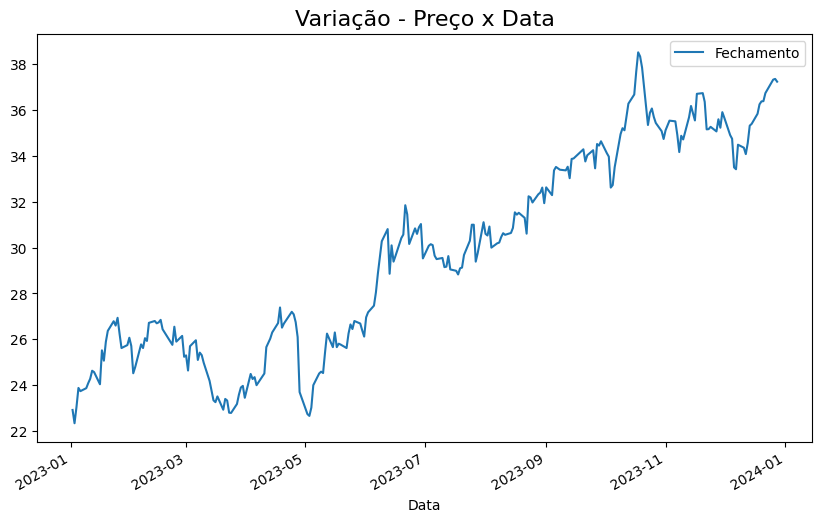

In [31]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação - Preço x Data', fontsize=16)
plt.legend(['Fechamento'])

### Construindo gráficos de Candlestick

In [32]:
df = dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030735,58130000,19369.0


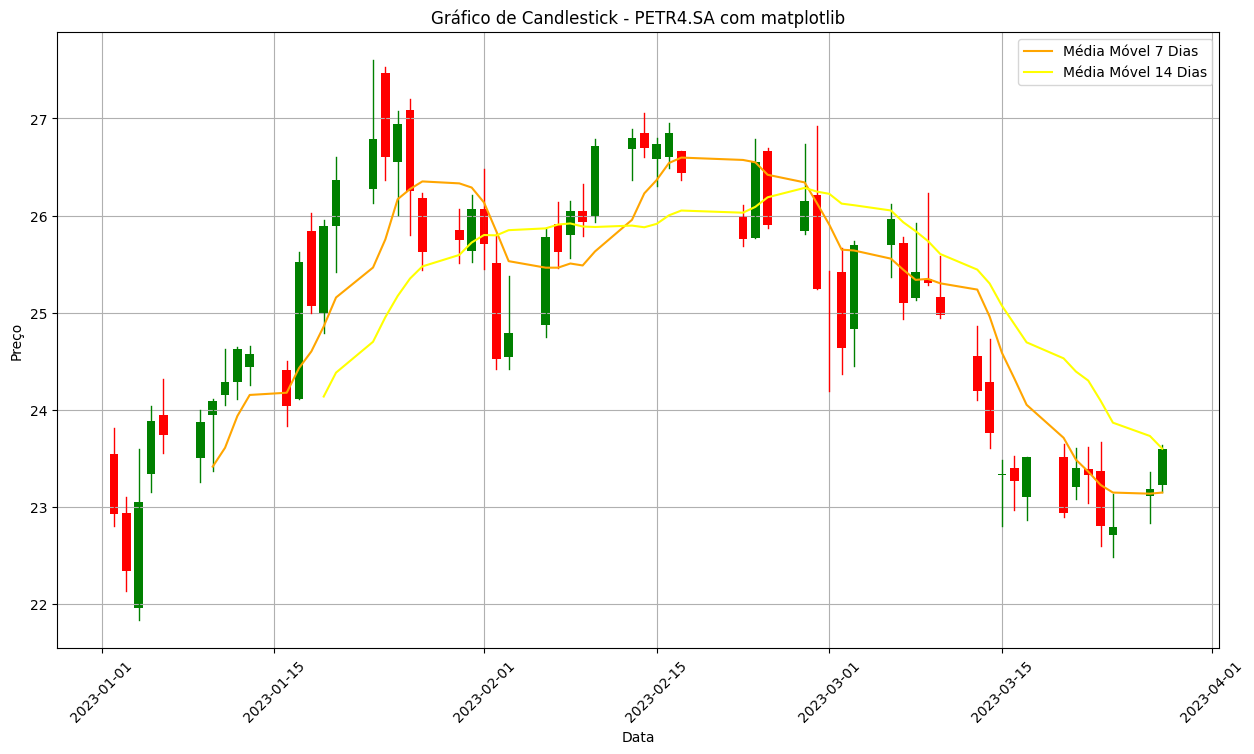

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [34]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

### Usando Api para Plotagem de Gráficos

In [35]:
dados = yf.download('PETR4.SA',start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


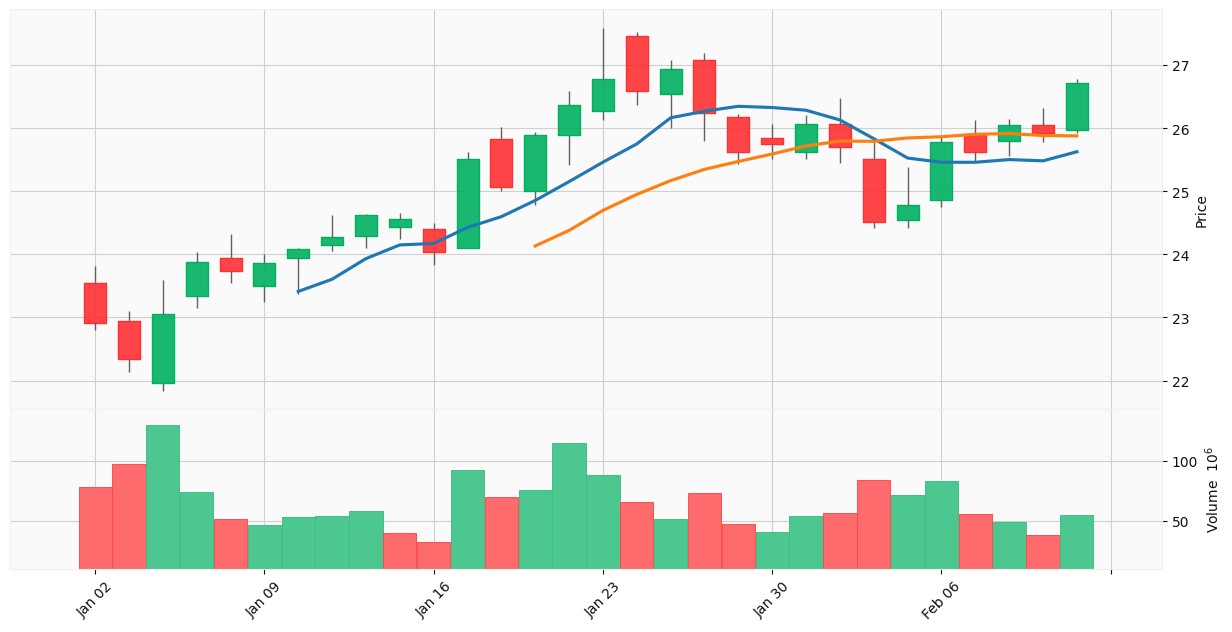

In [36]:
mpf.plot(dados.head(30), type='candle', figsize=(16,8), volume = True, mav=(7, 14), style='yahoo')

### Desafio da Aula 4
- Buscar a ação da Apple e recriar o gráfico de Candlestick usando a biblioteca MPLFinance.

[*********************100%%**********************]  1 of 1 completed


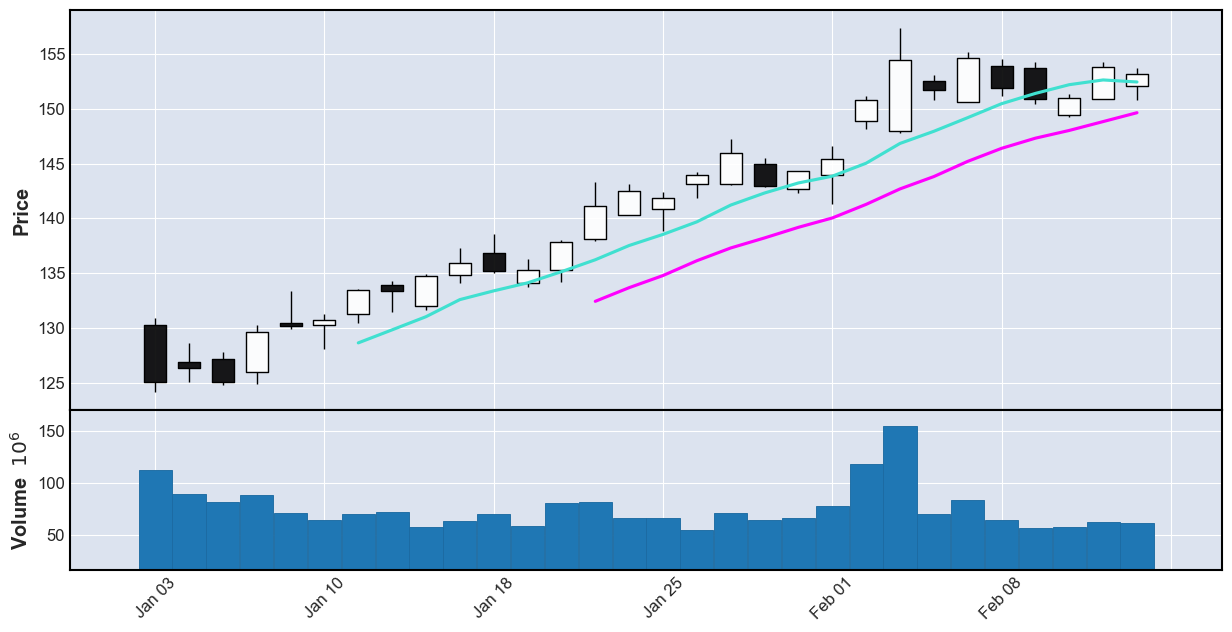

In [37]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))

## Aula 05 - Previsão de Séries Temporais de Ações

In [38]:
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099121,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216782,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [39]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [40]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date':'ds', 'Close': 'y'})

In [41]:
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [42]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)
modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

19:14:32 - cmdstanpy - INFO - Chain [1] start processing
19:14:32 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

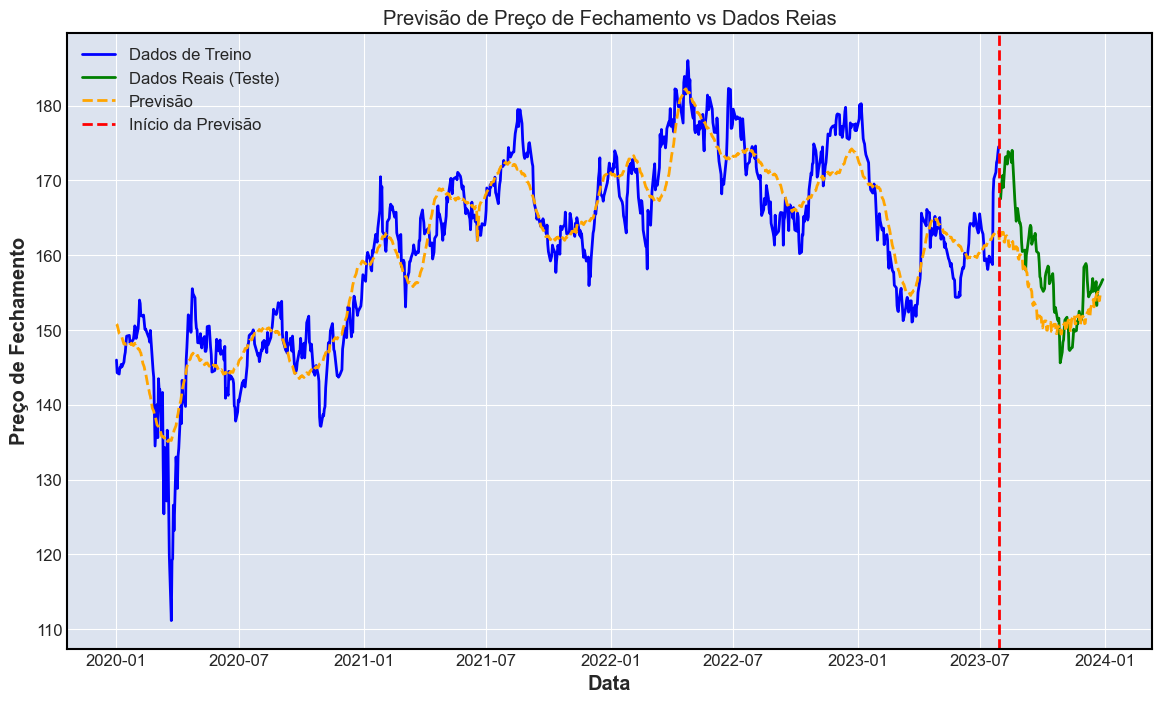

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reias')
plt.title('Previsão de Preço de Fechamento vs Dados Reias')
plt.legend()
plt.show()